<a href="https://colab.research.google.com/github/francji1/01RAD/blob/main/code/Homework_03_Kohout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Individual student work

# **Exercise: Developing a Marketing Plan Based on Advertising Data**

Imagine that you are statistical consultants tasked with building a marketing plan for the next year to maximize product sales. You have access to a dataset that contains information on the advertising budget allocated to three different media channels—**TV**, **Radio**, and **Newspaper**—and the corresponding **Sales** figures.

## **Dataset Description**

- **Variables:**
  - **TV**: Advertising budget allocated to TV (in thousands of dollars)
  - **Radio**: Advertising budget allocated to Radio (in thousands of dollars)
  - **Newspaper**: Advertising budget allocated to Newspaper (in thousands of dollars)
  - **Sales**: Product sales (in thousands of units)

## **Tasks**

Based on this data and your final regression model, answer the following questions:

1. **Relationship Between Advertising Budget and Sales**
   - Is there a statistically significant relationship between the advertising budget and sales?

2. **Contribution of Each Media**
   - Do all three media channels—TV, Radio, and Newspaper—contribute to sales?
   - Which media have significant effects on sales?

3. **Media Generating the Biggest Boost in Sales**
   - Which advertising medium generates the largest increase in sales per unit increase in budget?

4. **Strength of the Relationship**
   - How strong is the relationship between the advertising budget and sales?
   - What is the coefficient of determination (R-squared) of your model?

5. **Effect of TV Advertising**
   - How much increase in sales is associated with a given increase in TV advertising budget?

6. **Effect of Radio Advertising**
   - How much increase in sales is associated with a given increase in Radio advertising budget?

7. **Accuracy of Estimated Effects**
   - How accurately can we estimate the effect of each medium on sales?
   - Provide the confidence intervals for the coefficients of each medium.

8. **Predicting Future Sales**
   - How accurately can we predict future sales based on the advertising budgets?
   - What is the standard error of the estimate?

9. **Optimal Allocation of Advertising Budget**
    - Imagine you have a budget of $100,000. What is the best strategy to allocate this budget among TV, Radio, and Newspaper advertising to maximize sales?

10. **Predicting Sales for Specific Budget Allocation**
    - If you spend $10,000 on TV advertising and $20,000 on Radio advertising, how much increase in sales can you expect?

11. **Confidence Interval for Predicted Sales**
    - What is the 95% confidence interval for the predicted sales in the previous question?

12. **Checking Correlation Between Independent Variables**
    - Are there significant correlations between the advertising budgets for different media?
    - How might multicollinearity affect your regression model?




In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.datasets import get_rdataset
from scipy.stats import t,norm

from sklearn.linear_model import LinearRegression

In [2]:
# Load the data
Advert = pd.read_csv("https://raw.githubusercontent.com/francji1/01RAD/main/data/Advert.csv", sep=",")
Advert.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# 1. **Relationship Between Advertising Budget and Sales**
   - Is there a statistically significant relationship between the advertising budget and sales?

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           5.06e-62
Time:                        06:07:33   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2430      0.439      9.676   

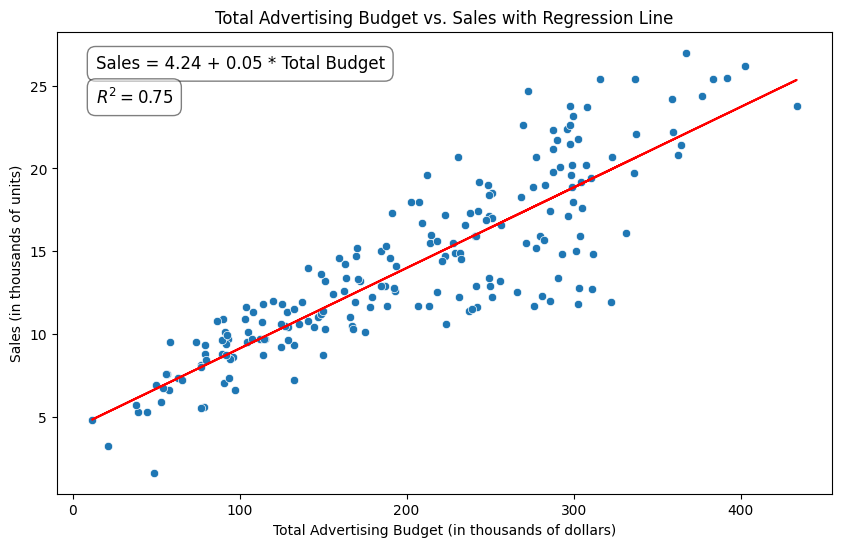

In [3]:
# Create a new column 'total_budget' which is the sum of TV, radio, and newspaper
Advert['total_budget'] = Advert['TV'] + Advert['radio'] + Advert['newspaper']

# Define the predictor variable (X) and the predicted variable (y)
X = Advert['total_budget']
y = Advert['sales']

# Add a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()
model_simple = model

# Print the model summary
print(model.summary())

# Test the hypothesis that the relationship is statistically significant (check the p-value of the total_budget coefficient)
alpha = 0.05
p_value = model.pvalues['total_budget']

if p_value < alpha:
    print("\nConclusion: The relationship between total advertising budget and sales is statistically significant (p < 0.05).")
else:
    print("\nConclusion: The relationship between total advertising budget and sales is not statistically significant (p >= 0.05).")

# Add a scatter plot with the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Advert['total_budget'], y=Advert['sales'])
plt.plot(Advert['total_budget'], model.predict(X), color='red')
plt.xlabel('Total Advertising Budget (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('Total Advertising Budget vs. Sales with Regression Line')

# Add regression equation and R-squared to the plot
equation = f'Sales = {model.params["const"]:.2f} + {model.params["total_budget"]:.2f} * Total Budget'
r_squared = f'$R^2 = {model.rsquared:.2f}$'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
plt.text(0.05, 0.88, r_squared, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))


plt.show()

# 2. **Contribution of Each Media**
   - Do all three media channels—TV, Radio, and Newspaper—contribute to sales?
   - Which media have significant effects on sales?


## Single-variate regression

Analyzing relationship between TV and Sales:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.47e-42
Time:                        06:07:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const  

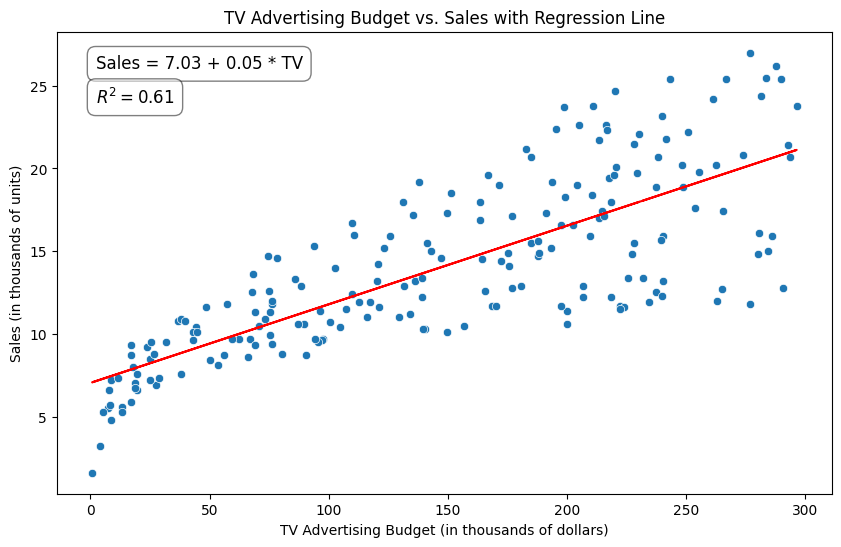

--------------------------------------------------
Analyzing relationship between radio and Sales:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.35e-19
Time:                        06:07:34   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

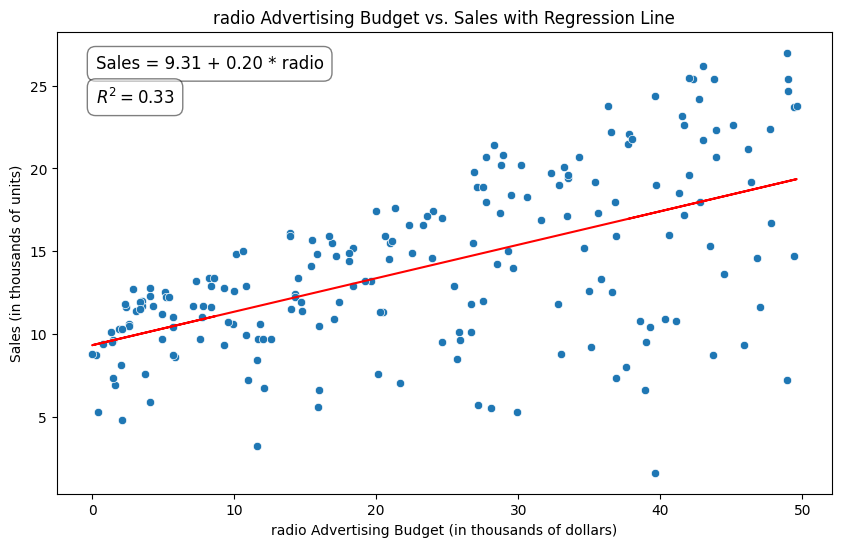

--------------------------------------------------
Analyzing relationship between newspaper and Sales:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 22 Oct 2025   Prob (F-statistic):            0.00115
Time:                        06:07:34   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

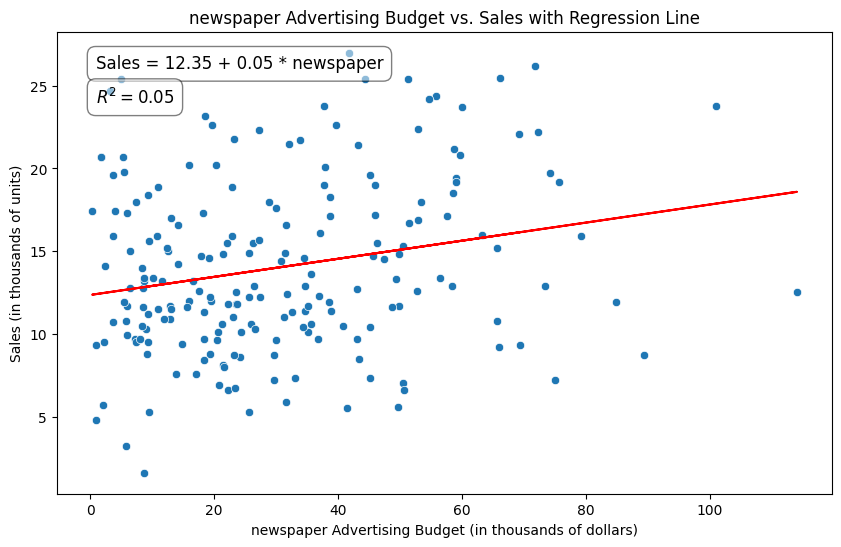

--------------------------------------------------


In [4]:
# List of media columns to analyze
media_columns = ['TV', 'radio', 'newspaper']

for media in media_columns:
    print(f"Analyzing relationship between {media} and Sales:")

    # Define the predictor variable (X) and the predicted variable (y)
    X = Advert[media]
    y = Advert['sales']

    # Add a constant to the predictor variable for the intercept
    X = sm.add_constant(X)

    # Create and fit the OLS model
    model = sm.OLS(y, X).fit()

    # Print the model summary
    print(model.summary())

    # Test the hypothesis that the relationship is statistically significant
    alpha = 0.05
    p_value = model.pvalues[media]

    if p_value < alpha:
        print(f"\nConclusion: The relationship between {media} advertising budget and sales is statistically significant (p < 0.05).")
    else:
        print(f"\nConclusion: The relationship between {media} advertising budget and sales is not statistically significant (p >= 0.05).")

    # Add a scatter plot with the regression line
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=Advert[media], y=Advert['sales'])
    plt.plot(Advert[media], model.predict(X), color='red')
    plt.xlabel(f'{media} Advertising Budget (in thousands of dollars)')
    plt.ylabel('Sales (in thousands of units)')
    plt.title(f'{media} Advertising Budget vs. Sales with Regression Line')

    # Add regression equation and R-squared to the plot
    equation = f'Sales = {model.params["const"]:.2f} + {model.params[media]:.2f} * {media}'
    r_squared = f'$R^2 = {model.rsquared:.2f}$'
    plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))
    plt.text(0.05, 0.88, r_squared, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.5))

    plt.show()
    print("-" * 50) # Separator for clarity

**Conclusion:** All media are statistically significant.

## Multi-variate regression

In [5]:
multi_model_formula = smf.ols('sales ~ TV + radio + newspaper', data=Advert).fit()

print(multi_model_formula.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           1.58e-96
Time:                        06:07:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

Statistically significant predictors (alpha=0.05): ['TV', 'radio']
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           4.83e-98
Time:                        06:07:35   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

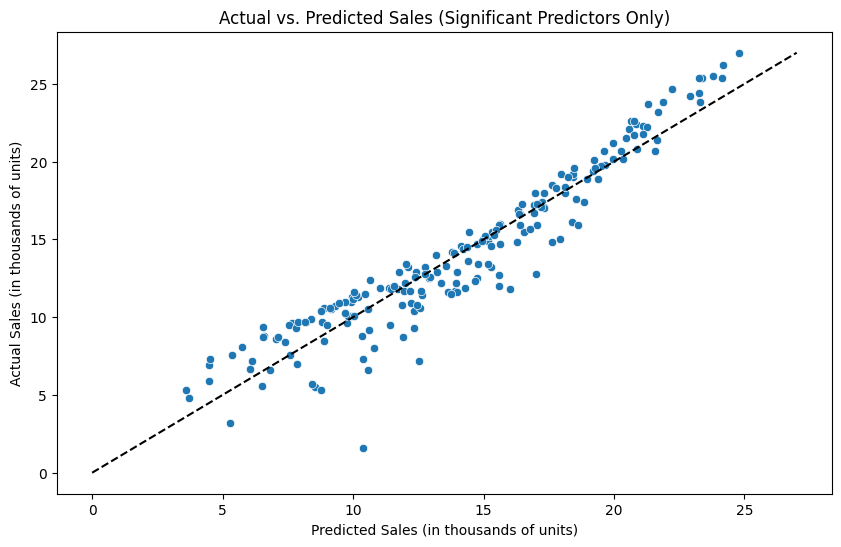

In [6]:
# Assuming the multiple regression model with all predictors ('multi_model_formula')
# from cell wkAn4seIw8yz is available and has been run.

# Define the significance level
alpha = 0.05

# Get the p-values from the multiple regression model summary
p_values = multi_model_formula.pvalues

# Identify statistically significant predictor variables (excluding the intercept)
significant_predictors = p_values[p_values < alpha].index.tolist()
if 'Intercept' in significant_predictors:
    significant_predictors.remove('Intercept')

print(f"Statistically significant predictors (alpha={alpha}): {significant_predictors}")

# Create a multivariate model using only statistically significant predictors
X_significant = Advert[significant_predictors]
y = Advert['sales']

# # Add a constant for the intercept
X_significant = sm.add_constant(X_significant)

# Create and fit the OLS model
significant_model = sm.OLS(y, X_significant).fit()

# Print the model summary
print(significant_model.summary())

# Get predicted values from the significant model
predicted_sales_significant = significant_model.predict(X_significant)

# Create a scatter plot of actual vs. predicted sales for the significant model
plt.figure(figsize=(10, 6))
sns.scatterplot(y=Advert['sales'], x=predicted_sales_significant)
plt.ylabel('Actual Sales (in thousands of units)')
plt.xlabel('Predicted Sales (in thousands of units)')
plt.title('Actual vs. Predicted Sales (Significant Predictors Only)')

# Add a y=x line
max_sales = Advert['sales'].max()
plt.plot([0, max_sales], [0, max_sales], color='black', linestyle='--')

plt.show()

## Multivariate regression with cross-variables

In [7]:
# Perform multivariate regression with interaction terms using R-style formula
# The syntax TV*radio*newspaper includes main effects and all interactions (two-way and three-way)
multi_model_interactions = smf.ols('sales ~ TV * radio * newspaper', data=Advert).fit()

# Print the model summary
print(multi_model_interactions.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     847.3
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.16e-140
Time:                        06:07:35   Log-Likelihood:                -267.45
No. Observations:                 200   AIC:                             550.9
Df Residuals:                     192   BIC:                             577.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.5559      0

❗❗❗**Notice the warning on multicolinearity** more on that in point 12. ❗❗❗

In [8]:
# Starting with the full model with interactions
current_model = multi_model_interactions

print("Starting backward elimination...")

# Define significance level for removal
alpha_remove = 0.05

# Initial list of predictor variables (excluding the intercept)
current_predictors = list(current_model.pvalues.index)
if 'Intercept' in current_predictors:
    current_predictors.remove('Intercept')

# Iteratively remove the least significant variable until all are significant
while True:
    # Get p-values for current predictors
    p_values = current_model.pvalues.drop('Intercept', errors='ignore')

    # Find the variable with the highest p-value among the current predictors
    max_p_value = p_values.max()
    least_significant_variable = p_values.idxmax()

    # Check if the least significant variable's p-value is above the threshold
    if max_p_value > alpha_remove:
        print(f"\nRemoving '{least_significant_variable}' with p-value {max_p_value:.4f}...")

        # Remove the least significant variable from the list of current predictors
        current_predictors.remove(least_significant_variable)

        # If no predictors are left, break the loop
        if not current_predictors:
            print("All variables removed or no significant predictors left.")
            break

        # Build the new formula from the updated list of predictors
        new_formula = 'sales ~ ' + ' + '.join(current_predictors)

        # Fit the new model
        current_model = smf.ols(new_formula, data=Advert).fit()

        # Print summary of the new model (optional, for debugging)
        # print(current_model.summary())

    else:
        print("\nBackward elimination finished: All remaining variables are statistically significant (p < 0.05).")
        break

print("\nFinal model after backward elimination:")
print(current_model.summary())

Starting backward elimination...

Removing 'radio:newspaper' with p-value 0.9851...

Removing 'TV:radio:newspaper' with p-value 0.5878...

Backward elimination finished: All remaining variables are statistically significant (p < 0.05).

Final model after backward elimination:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.13e-143
Time:                        06:07:36   Log-Likelihood:                -267.61
No. Observations:                 200   AIC:                             547.2
Df Residuals:                     194   BIC:                             567.0
Df Model:                           5                                         
Covariance T

# 3. **Media Generating the Biggest Boost in Sales**
   - Which advertising medium generates the largest increase in sales per unit increase in budget?




*   From single variate model: **radio**: 0.2025 || C. interval: (0.162; 0.243)
*   From multivariate model: **radio**: 0.1880 || C. interval: (0.172; 0.204)
*   From multivariate model: **TV or radio**

**TV**: 0.0203 || C. interval: (0.017; 0.024)

**radio**: 0.0202 || C. interval: (0.001; 0.039)

 **+ TV:radio**: 0.0011 || C. interval: (0.001; 0.001)






# 4. **Strength of the Relationship**
   - How strong is the relationship between the advertising budget and sales?
   - What is the coefficient of determination (R-squared) of your model?

-> relationship: 0.0487 || C. interval (0.045; 0.053)

-> R^2: 0.753

In [9]:
print(model_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Wed, 22 Oct 2025   Prob (F-statistic):           5.06e-62
Time:                        06:07:36   Log-Likelihood:                -473.88
No. Observations:                 200   AIC:                             951.8
Df Residuals:                     198   BIC:                             958.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.2430      0.439      9.676   

# 5. and 6. **Effect of TV and Radio Advertising**
   - How much increase in sales is associated with a given increase in TV advertising budget?
   - How much increase in sales is associated with a given increase in Radio advertising budget?

**See point 3.**

TV: 0.0203 || C. interval: (0.017; 0.024)

radio: 0.0202 || C. interval: (0.001; 0.039)

In [10]:
print(current_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.13e-143
Time:                        06:07:36   Log-Likelihood:                -267.61
No. Observations:                 200   AIC:                             547.2
Df Residuals:                     194   BIC:                             567.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5408      0.265     24.668   

# 7. **Accuracy of Estimated Effects**
   - How accurately can we estimate the effect of each medium on sales?
   - Provide the confidence intervals for the coefficients of each medium.

In [11]:
print(current_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     1197.
Date:                Wed, 22 Oct 2025   Prob (F-statistic):          1.13e-143
Time:                        06:07:36   Log-Likelihood:                -267.61
No. Observations:                 200   AIC:                             547.2
Df Residuals:                     194   BIC:                             567.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5408      0.265     24.668   

# 8. **Predicting Future Sales**
   - How accurately can we predict future sales based on the advertising budgets?
   - What is the standard error of the estimate?

In [12]:
print("R^2:\t\t",current_model.rsquared)
print("Adj. R^2:\t",current_model.rsquared_adj)

R^2:		 0.9685961394359458
Adj. R^2:	 0.9677867615863568


In [13]:
print("Standard error estimate:\t", np.sqrt(current_model.mse_resid))

Standard error estimate:	 0.9364315464761832


# 9. **Optimal Allocation of Advertising Budget**
    - Imagine you have a budget of $100,000. What is the best strategy to allocate this budget among
     TV, Radio, and Newspaper advertising to maximize sales?

## Optimal expected sales

In [14]:
import scipy.optimize as optimize

# Define the function to maximize (sales) as F(x) = -predicted_sales
# The optimization function in scipy.optimize minimizes, so we minimize the negative of the sales.
# x will be a list or array of [TV_budget, radio_budget, newspaper_budget] in thousands of dollars.
# The 'current_model' is the final model after backward elimination.
def F(x):
    # Ensure the input values are non-negative
    if any(i < 0 for i in x):
        return np.inf  # Return infinity if any budget is negative

    # Create a new DataFrame for the prediction with the required columns
    # The model includes interaction terms, so we need to include them in the new data.
    new_data = pd.DataFrame({
        'TV': [x[0]],
        'radio': [x[1]],
        'newspaper': [x[2]],
        'TV:radio': [x[0] * x[1]],  # Interaction term
        'TV:newspaper': [x[0] * x[2]] # Interaction term
        # Note: 'radio:newspaper' and 'TV:radio:newspaper' were removed during backward elimination
    })

    # Add a constant for the intercept if the model was fitted with one
    # Check if the model summary indicates an intercept
    if 'Intercept' in current_model.params.index or 'const' in current_model.params.index:
         new_data = sm.add_constant(new_data, has_constant='add')


    # Get the predicted sales from the model
    prediction = current_model.get_prediction(new_data)

    # We want to maximize sales, so we minimize the negative of the predicted mean.
    return -prediction.predicted_mean[0]

# Define the constraint: the sum of budgets must be 100
# This is an equality constraint: x[0] + x[1] + x[2] - 100 = 0
constraints = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] - 100})

# Define the bounds for each variable: budgets must be non-negative
bounds = [(0, None), (0, None), (0, None)] # (lower_bound, upper_bound) for each variable

# Initial guess for the budget allocation (e.g., distributing equally)
initial_guess = [100/3, 100/3, 100/3]

# Use scipy.optimize.minimize with the 'SLSQP' method
# SLSQP is suitable for problems with bounds and equality/inequality constraints
result = optimize.minimize(F, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimization results
print("Optimization Results:")
print(result)

# Extract the optimal budget allocation and the predicted sales at that allocation
optimal_budget = result.x
optimal_sales = -result.fun # Negate the result back to get the maximized sales

print(f"\nOptimal Budget Allocation (in thousands of dollars):")
print(f"  TV: {optimal_budget[0]:.2f}")
print(f"  Radio: {optimal_budget[1]:.2f}")
print(f"  Newspaper: {optimal_budget[2]:.2f}")

print(f"\nMaximum Expected Sales for a $100,000 Budget: {optimal_sales:.2f} (in thousands of units)")

Optimization Results:
     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -11.407310407162877
           x: [ 5.007e+01  4.993e+01  3.706e-12]
         nit: 13
         jac: [-7.707e-02 -7.707e-02 -9.557e-03]
        nfev: 52
        njev: 13
 multipliers: [-7.707e-02]

Optimal Budget Allocation (in thousands of dollars):
  TV: 50.07
  Radio: 49.93
  Newspaper: 0.00

Maximum Expected Sales for a $100,000 Budget: 11.41 (in thousands of units)


## Optimal lower bound of prediction interval

In [15]:
import scipy.optimize as optimize

# Define the function to maximize (sales) as F(x) = -predicted_sales
# The optimization function in scipy.optimize minimizes, so we minimize the negative of the sales.
# x will be a list or array of [TV_budget, radio_budget, newspaper_budget] in thousands of dollars.
# The 'current_model' is the final model after backward elimination.
def F(x):
    # Ensure the input values are non-negative
    if any(i < 0 for i in x):
        return np.inf  # Return infinity if any budget is negative

    # Create a new DataFrame for the prediction with the required columns
    # The model includes interaction terms, so we need to include them in the new data.
    new_data = pd.DataFrame({
        'TV': [x[0]],
        'radio': [x[1]],
        'newspaper': [x[2]],
        'TV:radio': [x[0] * x[1]],  # Interaction term
        'TV:newspaper': [x[0] * x[2]] # Interaction term
        # Note: 'radio:newspaper' and 'TV:radio:newspaper' were removed during backward elimination
    })

    # Add a constant for the intercept if the model was fitted with one
    # Check if the model summary indicates an intercept
    if 'Intercept' in current_model.params.index or 'const' in current_model.params.index:
         new_data = sm.add_constant(new_data, has_constant='add')


    # Get the predicted sales from the model
    prediction = current_model.get_prediction(new_data)

    # We want to maximize sales, so we minimize the negative of the predicted mean.
    return -float(prediction.summary_frame()["obs_ci_lower"])

# Define the constraint: the sum of budgets must be 100
# This is an equality constraint: x[0] + x[1] + x[2] - 100 = 0
constraints = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] - 100})

# Define the bounds for each variable: budgets must be non-negative
bounds = [(0, None), (0, None), (0, None)] # (lower_bound, upper_bound) for each variable

# Initial guess for the budget allocation (e.g., distributing equally)
initial_guess = [100/3, 100/3, 100/3]

# Use scipy.optimize.minimize with the 'SLSQP' method
# SLSQP is suitable for problems with bounds and equality/inequality constraints
result = optimize.minimize(F, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints)

# Print the optimization results
print("Optimization Results:")
print(result)

# Extract the optimal budget allocation and the predicted sales at that allocation
optimal_budget = result.x
optimal_sales = -result.fun # Negate the result back to get the maximized sales

print(f"\nOptimal Budget Allocation (in thousands of dollars):")
print(f"  TV: {optimal_budget[0]:.2f}")
print(f"  Radio: {optimal_budget[1]:.2f}")
print(f"  Newspaper: {optimal_budget[2]:.2f}")

print(f"\nMaximum Expected Sales for a $100,000 Budget: {optimal_sales:.2f} (in thousands of units)")

/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: Fut

Optimization Results:
     message: Optimization terminated successfully
     success: True
      status: 0
         fun: -9.466940251184797
           x: [ 5.207e+01  4.793e+01  5.259e-13]
         nit: 13
         jac: [-7.578e-02 -7.578e-02 -1.159e-02]
        nfev: 52
        njev: 13
 multipliers: [-7.578e-02]

Optimal Budget Allocation (in thousands of dollars):
  TV: 52.07
  Radio: 47.93
  Newspaper: 0.00

Maximum Expected Sales for a $100,000 Budget: 9.47 (in thousands of units)


/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return -float(prediction.summary_frame()["obs_ci_lower"])
/tmp/ipython-input-3063099422.py:33: Fut

In [16]:
sum(result.x)

np.float64(100.0)

# 10. and 11. **Predicting Sales for Specific Budget Allocation (+ confidence interval)**
    - If you spend $10,000 on TV advertising and $20,000 on Radio advertising, how much increase in
     sales can you expect?
    - What is the 95% confidence interval for the predicted sales in the previous question?


In [17]:
new_data = pd.DataFrame({
    'TV': [10],
    'radio': [20],
    'newspaper': [0],
    'TV:radio': [10 * 20], # Interaction term
    'TV:newspaper': [10 * 0] # Interaction term
})

# Use the final model after backward elimination ('current_model') to get the prediction and confidence interval
prediction = current_model.get_prediction(new_data)

# Print the predicted sales
print(f"Predicted Sales: {prediction.predicted_mean[0]:.2f} (in thousands of units)")

# Print the 95% confidence interval for the prediction
print(f"95% Confidence Interval for Predicted Sales: {prediction.conf_int(alpha=0.05)[0]} (in thousands of units)")

Predicted Sales: 7.38 (in thousands of units)
95% Confidence Interval for Predicted Sales: [6.95202654 7.79814059] (in thousands of units)


In [18]:
# Get the prediction interval from the summary frame
prediction_interval_lower = prediction.summary_frame(alpha=0.05)['obs_ci_lower'].values[0]
prediction_interval_upper = prediction.summary_frame(alpha=0.05)['obs_ci_upper'].values[0]


# Print the 95% prediction interval
print(f"95% Prediction Interval for Predicted Sales: [{prediction_interval_lower:.2f}, {prediction_interval_upper:.2f}] (in thousands of units)")

95% Prediction Interval for Predicted Sales: [5.48, 9.27] (in thousands of units)


In [19]:
prediction.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,7.375084,0.214503,6.952027,7.798141,5.480356,9.269811


# 12. **Checking Correlation Between Independent Variables**
    - Are there significant correlations between the advertising budgets for different media?
    - How might multicollinearity affect your regression model?

Correlation Matrix of Predictor Variables:
                 TV     radio  newspaper
TV         1.000000  0.054809   0.056648
radio      0.054809  1.000000   0.354104
newspaper  0.056648  0.354104   1.000000


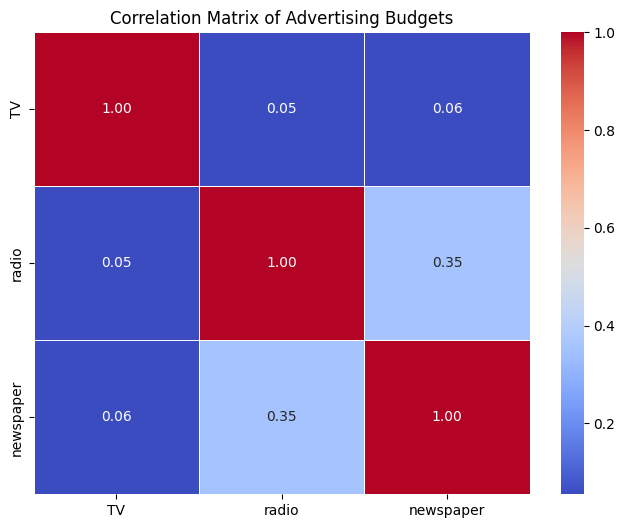


Interpretation of Multicollinearity:
- High correlation values (close to 1 or -1) between predictor variables indicate multicollinearity.
- Multicollinearity can make it difficult to interpret the individual coefficients of the correlated variables in a regression model, as it becomes hard to isolate the effect of one variable from the others.
- It can also lead to larger standard errors for the coefficients, making them less precise.
- While multicollinearity doesn't necessarily affect the overall predictive power of the model, it impacts the reliability of the individual predictor's estimated effect.


In [20]:
# Select the predictor variables
predictor_variables = Advert[['TV', 'radio', 'newspaper']]

# Calculate the correlation matrix
correlation_matrix = predictor_variables.corr()

# Print the correlation matrix
print("Correlation Matrix of Predictor Variables:")
print(correlation_matrix)

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Advertising Budgets')
plt.show()

print("\nInterpretation of Multicollinearity:")
print("- High correlation values (close to 1 or -1) between predictor variables indicate multicollinearity.")
print("- Multicollinearity can make it difficult to interpret the individual coefficients of the correlated variables in a regression model, as it becomes hard to isolate the effect of one variable from the others.")
print("- It can also lead to larger standard errors for the coefficients, making them less precise.")
print("- While multicollinearity doesn't necessarily affect the overall predictive power of the model, it impacts the reliability of the individual predictor's estimated effect.")

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the predictor variables for VIF calculation
# It's important to use the same set of predictors as in your regression model
# Here, we'll use the main effects TV, radio, and newspaper as a common case
X = Advert[['TV', 'radio', 'newspaper']]

# Add a constant to the predictors (VIF calculation typically includes the intercept)
X = sm.add_constant(X)

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(X.shape[1])]

# Print the VIF values
print("Variance Inflation Factors (VIF):")
print(vif_data)

print("\nInterpretation of VIF:")
print("- VIF measures how much the variance of the estimate of a regression coefficient is increased due to multicollinearity.")
print("- A VIF of 1 means there is no correlation between the predictor and the other predictors.")
print("- VIF values between 1 and 5 are generally considered acceptable.")
print("- VIF values above 5 or 10 indicate potential multicollinearity issues.")

Variance Inflation Factors (VIF):
     feature       VIF
0      const  6.848900
1         TV  1.004611
2      radio  1.144952
3  newspaper  1.145187

Interpretation of VIF:
- VIF measures how much the variance of the estimate of a regression coefficient is increased due to multicollinearity.
- A VIF of 1 means there is no correlation between the predictor and the other predictors.
- VIF values between 1 and 5 are generally considered acceptable.
- VIF values above 5 or 10 indicate potential multicollinearity issues.
